Redeneer waarom je keuzes maakt

Gebruik datasets van deze website:https://ourworldindata.org/
Beantwoord de volgende vragen:

1.   What is the biggest predictor of a large CO2 output per capita of a country? 

2.   which countries are making the biggest strides in decreasing CO2 output? deel is al gedaan in de co2 assignment, maar je moet kijken naar de groei van populatie. (=correlatievraag)

3. which non-fossil fuel energy technology will have the best price in the future?



# 1: Biggest predictor of CO2 output
To determine this you may want to consider things like GDP per capita, diets, number of cars per capita, various energy source, mobility and other factors.

Your answer can also be a specific combination of certain factors.

In [2]:
import pandas as pd
import numpy as np

In [ ]:
#Data inlezen, gezocht op de website naar een dataset waar veel variabelen in staan. Daar deze gevonden: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions, doorgelinkd naar: https://github.com/owid/co2-data

df_predictors = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv", encoding = 'cp1252')
df_predictors

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,AFG,7752117.0,9.421400e+09,NaN,NaN,0.084,0.070,475.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,AFG,7840151.0,9.692280e+09,NaN,NaN,0.092,0.007,8.70,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,AFG,7935996.0,1.001733e+10,NaN,NaN,0.092,0.000,0.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,AFG,8039684.0,1.063052e+10,NaN,NaN,0.106,0.015,16.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,Zimbabwe,2016,ZWE,14030338.0,2.096179e+10,0.639,0.046,10.738,-1.488,-12.17,...,0.02,NaN,NaN,NaN,0.03,NaN,115.92,28.53,1.415,13.18
26004,Zimbabwe,2017,ZWE,14236599.0,2.194784e+10,0.678,0.048,9.582,-1.156,-10.77,...,0.02,NaN,NaN,NaN,0.03,NaN,115.59,28.30,1.666,17.39
26005,Zimbabwe,2018,ZWE,14438812.0,2.271535e+10,0.697,0.048,11.854,2.273,23.72,...,0.02,NaN,NaN,NaN,0.03,NaN,118.22,30.83,1.308,11.04
26006,Zimbabwe,2019,ZWE,14645473.0,NaN,0.697,0.048,10.949,-0.905,-7.64,...,0.02,NaN,NaN,NaN,0.03,NaN,117.96,30.53,1.473,13.45


In [ ]:
#Om te weten welke kolommen ik nodig heb print ik een rij met kolommen
df_predictors.columns


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'methane', 'methane_per_capita', 'nitrous_oxide',
       'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_glo

In [ ]:
#Vervolgens selecteer ik de kolommen die ik wel wil gebruiken
#Ik wil kijken naar variabelen zoals: populatie, inkomen, gebruik van vernieuwbare bronnen

df_predictors = df_predictors[['country', 'year', 'population', 'gdp', 'co2', 
       'methane', 'nitrous_oxide','primary_energy_consumption']]

df_predictors

,country,year,population,gdp,co2,methane,nitrous_oxide,primary_energy_consumption
0,Afghanistan,1949,7624058.0,NaN,0.015,NaN,NaN,NaN
1,Afghanistan,1950,7752117.0,9.421400e+09,0.084,NaN,NaN,NaN
2,Afghanistan,1951,7840151.0,9.692280e+09,0.092,NaN,NaN,NaN
3,Afghanistan,1952,7935996.0,1.001733e+10,0.092,NaN,NaN,NaN
4,Afghanistan,1953,8039684.0,1.063052e+10,0.106,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
26003,Zimbabwe,2016,14030338.0,2.096179e+10,10.738,11.98,5.10,46.666
26004,Zimbabwe,2017,14236599.0,2.194784e+10,9.582,12.12,5.24,45.936
26005,Zimbabwe,2018,14438812.0,2.271535e+10,11.854,12.44,5.43,47.502
26006,Zimbabwe,2019,14645473.0,NaN,10.949,12.68,5.50,49.427


In [ ]:
#Ik wil weten of er sprake is van een correlatie daarvoor ga ik de null variabelen eruit halen en de volgende code runnen:
df_predictors.dropna().corr()

,year,population,gdp,co2,methane,nitrous_oxide,primary_energy_consumption
year,1.000000,0.034606,0.065638,0.042625,0.029564,0.032686,0.044748
population,0.034606,1.000000,0.912228,0.920415,0.961121,0.970847,0.910350
gdp,0.065638,0.912228,1.000000,0.973118,0.944608,0.956604,0.983295
co2,0.042625,0.920415,0.973118,1.000000,0.949222,0.963503,0.996085
methane,0.029564,0.961121,0.944608,0.949222,1.000000,0.986941,0.952682
nitrous_oxide,0.032686,0.970847,0.956604,0.963503,0.986941,1.000000,0.962400
primary_energy_consumption,0.044748,0.910350,0.983295,0.996085,0.952682,0.962400,1.000000


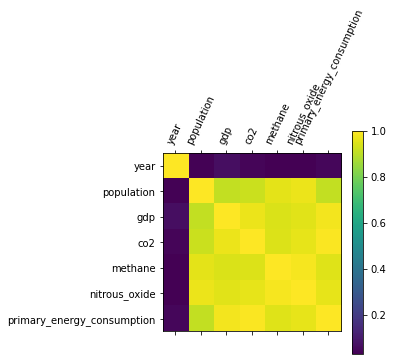

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(df_predictors.dropna().corr())
plt.xticks(range(df_predictors.select_dtypes(['number']).shape[1]), df_predictors.select_dtypes(['number']).columns, fontsize=10, rotation=65)
plt.yticks(range(df_predictors.select_dtypes(['number']).shape[1]), df_predictors.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
#plt.title('Correlation Matrix', fontsize=16);

plt.show()

# Hoe hoger de correlatie (1 is het hoogst), hoe meer de variabele invloed heeft op de uitstoot van CO2. In bovenstaand dataframe zie je al dat dit de primaire energieconsumptie is (0.996), om dit visueel nog eens duidelijk te maken
# heb ik dit in een plot gezet.Ook daar zie je dat de primaire energie consumptie de grootste voorspeller is. Daarna is het GDP de grootste voorspeller. 

# 2.   which countries are making the biggest strides in decreasing CO2 output? 


which countries are making the biggest strides in decreasing CO2 output? deel is al gedaan in de co2 assignment, maar je moet kijken naar de groei van populatie. (=correlatievraag). Feedback start bij 04.34 gaat door tot minuut 8.30 



1.   kijk naar de uitstoot per capita dus per persoon
2.   gebruik een algemenere df
3. kijk even naar pct.change ipv diff want dan heb je procentuele verandering van ieder jaar bijvoorbeeld. Dus gebruik CO2 gedeeld door de bevolking. 
4. maak er een grafiek van, of gesommeerde waardeneming. 



In [3]:
#Data inlezen, gezocht op de website naar een dataset waar veel variabelen in staan. Daar deze gevonden: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions, doorgelinkd naar: https://github.com/owid/co2-data

df_strides_decreasing_co2 = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv", encoding = 'cp1252')
df_strides_decreasing_co2

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,AFG,7752117.0,9.421400e+09,NaN,NaN,0.084,0.070,475.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,AFG,7840151.0,9.692280e+09,NaN,NaN,0.092,0.007,8.70,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,AFG,7935996.0,1.001733e+10,NaN,NaN,0.092,0.000,0.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,AFG,8039684.0,1.063052e+10,NaN,NaN,0.106,0.015,16.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,Zimbabwe,2016,ZWE,14030338.0,2.096179e+10,0.639,0.046,10.738,-1.488,-12.17,...,0.02,NaN,NaN,NaN,0.03,NaN,115.92,28.53,1.415,13.18
26004,Zimbabwe,2017,ZWE,14236599.0,2.194784e+10,0.678,0.048,9.582,-1.156,-10.77,...,0.02,NaN,NaN,NaN,0.03,NaN,115.59,28.30,1.666,17.39
26005,Zimbabwe,2018,ZWE,14438812.0,2.271535e+10,0.697,0.048,11.854,2.273,23.72,...,0.02,NaN,NaN,NaN,0.03,NaN,118.22,30.83,1.308,11.04
26006,Zimbabwe,2019,ZWE,14645473.0,NaN,0.697,0.048,10.949,-0.905,-7.64,...,0.02,NaN,NaN,NaN,0.03,NaN,117.96,30.53,1.473,13.45


In [4]:
df_strides_decreasing_co2.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'methane', 'methane_per_capita', 'nitrous_oxide',
       'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_glo

In [5]:
#Vervolgens selecteer ik de kolommen die ik wel wil gebruiken
#Ik wil kijken naar de co2 vermindering per capita

df_strides_decreasing_co2_per_capita = df_strides_decreasing_co2[['country', 'year', 'co2_per_capita']]

# Als index wil ik het jaartal zodat ik hier gemakkelijk op kan filteren 
df2 = df_strides_decreasing_co2_per_capita.set_index('year')
df2

,country,co2_per_capita
year,,
1949,Afghanistan,0.002
1950,Afghanistan,0.011
1951,Afghanistan,0.012
1952,Afghanistan,0.012
1953,Afghanistan,0.013
...,...,...
2016,Zimbabwe,0.765
2017,Zimbabwe,0.673
2018,Zimbabwe,0.821


In [6]:
#Ik kies een aantal jaren uit die ik goed kan gebruiken, in dit geval 1995 - 2000 2005 2010 2015 2020
df3 = df2.loc[[1995, 2000, 2005, 2010, 2015, 2020]]

# met de lege waarden kan je niet werken, dus die halen we eruit
df3 = df3.dropna()


In [7]:
#Ook gaan we de waarden weghalen die we niet nodig hebben. Eerst kijken we welke dat dat zijn
countrys = df3['country'].tolist()
print(countrys)

#uiteindelijk heb ik deze niet nodig gehad. Vond het lastig om een manier te gebruiken om veel landen te verwijderen want met de optie df = df[df['kolom'].str.contains("World")==False], kon ik kiezen voor maximaal 6 waarden
#Ik dacht, ik kan deze in een later stadium één voor één verwijderen maar dat bleek uiteindelijk niet nodig. 


['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia (excl. China & India)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)', 'European Union (27)', 'Eur

In [8]:
# Nu gaan we de tabel draaien zodat we berekeningen kunnen maken 
# Daarvoor moet je eerst de index los maken
df4 = df3.reset_index()

df5 = df4.pivot(index='country', columns='year', values='co2_per_capita')
df5 = df5.dropna()
df5

year,1995,2000,2005,2010,2015,2020
country,,,,,,
Afghanistan,0.068,0.036,0.051,0.288,0.230,0.312
Africa,1.077,1.094,1.155,1.173,1.119,0.990
Albania,0.664,0.960,1.360,1.509,1.555,1.576
Algeria,3.303,2.649,3.212,3.275,3.768,3.535
Andorra,6.656,8.013,7.293,6.117,5.966,6.035
...,...,...,...,...,...,...
Vietnam,0.383,0.658,1.130,1.575,2.082,2.613
World,4.083,4.107,4.525,4.793,4.810,4.465
Yemen,0.694,0.831,0.984,1.000,0.483,0.327


In [9]:
df5.columns

Int64Index([1995, 2000, 2005, 2010, 2015, 2020], dtype='int64', name='year')

In [10]:
#we gaan de verandering berekenen 
df5['rel_1995'] = 100
df5['rel_2000'] = ((df5[2000] - df5[1995]) / df5[1995]) * 100
df5['rel_2005'] = ((df5[2005] - df5[1995]) / df5[1995]) * 100
df5['rel_2010'] = ((df5[2010] - df5[1995]) / df5[1995]) * 100
df5['rel_2015'] = ((df5[2015] - df5[1995]) / df5[1995]) * 100
df5['rel_2020'] = ((df5[2020] - df5[1995]) / df5[1995]) * 100

df5

year,1995,2000,2005,2010,2015,2020,rel_1995,rel_2000,rel_2005,rel_2010,rel_2015,rel_2020
country,,,,,,,,,,,,
Afghanistan,0.068,0.036,0.051,0.288,0.230,0.312,100,-47.058824,-25.000000,323.529412,238.235294,358.823529
Africa,1.077,1.094,1.155,1.173,1.119,0.990,100,1.578459,7.242340,8.913649,3.899721,-8.077994
Albania,0.664,0.960,1.360,1.509,1.555,1.576,100,44.578313,104.819277,127.259036,134.186747,137.349398
Algeria,3.303,2.649,3.212,3.275,3.768,3.535,100,-19.800182,-2.755071,-0.847714,14.078111,7.023918
Andorra,6.656,8.013,7.293,6.117,5.966,6.035,100,20.387620,9.570313,-8.097957,-10.366587,-9.329928
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0.383,0.658,1.130,1.575,2.082,2.613,100,71.801567,195.039164,311.227154,443.603133,582.245431
World,4.083,4.107,4.525,4.793,4.810,4.465,100,0.587803,10.825373,17.389175,17.805535,9.355866
Yemen,0.694,0.831,0.984,1.000,0.483,0.327,100,19.740634,41.786744,44.092219,-30.403458,-52.881844


In [11]:
print(df5.columns)

Index([      1995,       2000,       2005,       2010,       2015,       2020,
       'rel_1995', 'rel_2000', 'rel_2005', 'rel_2010', 'rel_2015', 'rel_2020'],
      dtype='object', name='year')


In [13]:
#Nu we de relatieve verandering hebben berekend gaan we de tabel sorteren
# Eerst selecteren we de bruikbare kolommen
df6 = df5[['rel_1995', 'rel_2000', 'rel_2005', 'rel_2010', 'rel_2015', 'rel_2020']]

#Daarna gaan we deze sorteren. Ik zie weer een aantal nulwaarden (ook al waren deze eruit dacht ik?), dus ik verwijder deze opnieuw
df7 = df6.dropna()
# Ik sorteer de waarden. Ik heb nu gekozen voor ascending, maar dat had niet per se uitgemaakt.
df7 = df6.sort_values(by='rel_2020', ascending = False)

# Ik wil de landen weten die de grootste stappen hebben gemaakt in het terugdringen van de CO2, in dit geval dus de onderste vijf
df7_top_5 = df7.tail(5)

df7

year,rel_1995,rel_2000,rel_2005,rel_2010,rel_2015,rel_2020
country,,,,,,
Equatorial Guinea,100,497.058824,6208.823529,4141.176471,5353.529412,4204.117647
Laos,100,30.434783,68.840580,248.550725,892.753623,3271.014493
Mongolia,100,-9.162304,-1.279814,47.789412,125.479930,684.700407
Bosnia and Herzegovina,100,311.373874,379.842342,542.680180,506.193694,635.135135
Vietnam,100,71.801567,195.039164,311.227154,443.603133,582.245431
...,...,...,...,...,...,...
French Guiana,100,-40.478949,-43.414446,-40.961761,-48.030127,-52.896871
Gabon,100,-10.459364,-17.691402,-30.624264,-36.277974,-54.511190
Somalia,100,-31.645570,-27.848101,-35.443038,-41.772152,-55.696203


In [14]:
df7_top_5

year,rel_1995,rel_2000,rel_2005,rel_2010,rel_2015,rel_2020
country,,,,,,
French Guiana,100,-40.478949,-43.414446,-40.961761,-48.030127,-52.896871
Gabon,100,-10.459364,-17.691402,-30.624264,-36.277974,-54.511190
Somalia,100,-31.645570,-27.848101,-35.443038,-41.772152,-55.696203
Denmark,100,-13.658371,-19.306889,-24.811008,-47.439055,-61.590079
North Korea,100,-18.859295,-15.684692,-45.170837,-73.688458,-69.410815


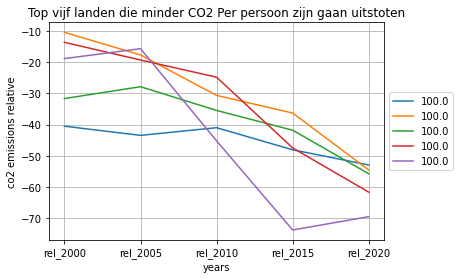

In [16]:
# We willen zichtbaar maken wat we nu zojuist hebben gedaan
# Dit doe ik via een plot. 
# ik begrijp niet waarom ik rij 0 selecteer maar hij toch de eerste rij pakt bij het label 
import matplotlib.pyplot as plt
import numpy as np

years = df7_top_5.columns[1:]
for i, row in df7_top_5.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("Top vijf landen die minder CO2 Per persoon zijn gaan uitstoten")
plt.xlabel("years")
plt.ylabel("co2 emissions relative")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

# Het is jammer dat ik het label niet goed krijg. Maar je ziet dat de paarse lijn de grootste stappen heeft gemaakt in het terugdringen van de CO2 per persoon. Uit df7_top_5 blijkt dat dit Noord Korea is. 

#  3. which non-fossil fuel energy technology will have the best price in the 

*   Lijstitem
*   Lijstitem

future?
Non-fossiel fuel is alles wat vernieuwbaar is. De vraag is dus welke vernieuwbare energie (bijv. zonne/ wind) heeft de beste prijs. Kijk dus ook naar de prijzen, wat is het goedkoopste. Twh = tijd en gaat niet over monetair. Gebruik hiervoor lineaire regressie. 

In [ ]:
# Data inlezen
# op deze website een tabel gevonden wat gaat over de kosten per hydrowat: https://ourworldindata.org/search?q=cost+per+energy 

df_cost_non_fossil = pd.read_csv("/content/levelized-cost-of-energy.csv", encoding = 'cp1252')
df_cost_non_fossil

,Entity,Code,Year,CSP LCOE (2019 USD/kWh),Hydro LCOE (2019 USD/kWh),Solar LCOE (2019 USD/kWh),Onshore wind LCOE (2019 USD/kWh),Bioenergy LCOE (2019 USD/kWh),Geothermal LCOE (2019 USD/kWh),Offshore wind LCOE (2019 USD/kWh)
0,Brazil,BRA,1998,NaN,NaN,NaN,0.069,NaN,NaN,NaN
1,Brazil,BRA,2001,NaN,NaN,NaN,0.149,NaN,NaN,NaN
2,Brazil,BRA,2002,NaN,NaN,NaN,0.129,NaN,NaN,NaN
3,Brazil,BRA,2003,NaN,NaN,NaN,0.145,NaN,NaN,NaN
4,Brazil,BRA,2005,NaN,NaN,NaN,0.137,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
408,World,OWID_WRL,2005,NaN,NaN,NaN,0.104,NaN,NaN,0.105
409,World,OWID_WRL,2006,NaN,NaN,NaN,0.105,NaN,NaN,0.108
410,World,OWID_WRL,2007,NaN,NaN,NaN,0.098,NaN,0.048498,0.178
411,World,OWID_WRL,2008,NaN,NaN,NaN,0.088,NaN,0.042653,0.178


In [ ]:
#Om te weten welke kolommen ik nodig heb print ik een rij met kolommen

df_cost_non_fossil.columns

Index(['Entity', 'Code', 'Year', 'CSP LCOE (2019 USD/kWh)',
       'Hydro LCOE (2019 USD/kWh)', 'Solar LCOE (2019 USD/kWh)',
       'Onshore wind LCOE (2019 USD/kWh)', 'Bioenergy LCOE (2019 USD/kWh)',
       'Geothermal LCOE (2019 USD/kWh)', 'Offshore wind LCOE (2019 USD/kWh)'],
      dtype='object')

In [ ]:
#Vervolgens selecteer ik de kolommen die ik wel wil gebruiken
#Eigenlijk wil ik bijna alle kolommen gebruiken, omdat deze informatie bezitten over non-fossiele brandstof (hydro, solar, bio, offshorewind).

df_cost_non_fossil = df_cost_non_fossil.drop(columns=['Code'])

#De namen zijn wel lang en daarom onhandig dus deze ga ik wel aanpassen. 
df_cost_non_fossil = df_cost_non_fossil.rename(columns={'CSP LCOE (2019 USD/kWh)': 'CSP', 'Hydro LCOE (2019 USD/kWh)' : 'Hydro', 'Solar LCOE (2019 USD/kWh)' : 'Solar',
       'Onshore wind LCOE (2019 USD/kWh)': 'Onshore_wind', 'Bioenergy LCOE (2019 USD/kWh)' : 'Bioenergy',
       'Geothermal LCOE (2019 USD/kWh)' : 'Geothermal', 'Offshore wind LCOE (2019 USD/kWh)': 'Offshore_wind'})

#Omdat dit een algemene vraag is heb je eigenlijk alleen de totale informatie nodig. In dit geval gebruik ik daarom ook de Entity 'World'. 
df_cost_non_fossil = df_cost_non_fossil[df_cost_non_fossil['Entity'].str.contains("World")==True]


# De kolom 'Entity' mag verwijderd worden en ik wil zet de jaartallen op de index 
df_cost_non_fossil = df_cost_non_fossil.drop(columns=['Entity'])
df_cost_non_fossil.sort_values(by=['Year'], inplace=True)


df_cost_non_fossil


,Year,CSP,Hydro,Solar,Onshore_wind,Bioenergy,Geothermal,Offshore_wind
386,1983,NaN,NaN,NaN,0.308,NaN,NaN,NaN
387,1984,NaN,NaN,NaN,0.294,NaN,NaN,NaN
388,1985,NaN,NaN,NaN,0.276,NaN,NaN,NaN
389,1986,NaN,NaN,NaN,0.247,NaN,NaN,NaN
390,1987,NaN,NaN,NaN,0.240,NaN,NaN,NaN
391,1988,NaN,NaN,NaN,0.201,NaN,NaN,NaN
392,1989,NaN,NaN,NaN,0.187,NaN,NaN,NaN
393,1990,NaN,NaN,NaN,0.204,NaN,NaN,NaN
394,1991,NaN,NaN,NaN,0.196,NaN,NaN,NaN
395,1992,NaN,NaN,NaN,0.193,NaN,NaN,NaN


In [ ]:
# Uit de dataframe blijkt dat er pas vanaf 2010 informatie is over de verschillende energiebronnen. Daarom ga ik het dataframe nog meer aanpassen. 
df_cost_non_fossil = df_cost_non_fossil.loc[df_cost_non_fossil['Year'] > 2010]
df_cost_non_fossil

,Year,CSP,Hydro,Solar,Onshore_wind,Bioenergy,Geothermal,Offshore_wind
377,2011,0.3484,0.035594,0.2863,0.083,0.055425,NaN,0.175
378,2012,0.3525,0.037753,0.2225,0.083,0.060869,0.084536,0.154
379,2013,0.2681,0.042926,0.1751,0.082,0.081262,0.061515,0.177
380,2014,0.2432,0.043932,0.1636,0.076,0.082069,0.063591,0.183
381,2015,0.2508,0.039014,0.1264,0.069,0.073028,0.060107,0.169
382,2016,0.2903,0.052220,0.1139,0.066,0.071932,0.069951,0.146
383,2017,0.2533,0.055025,0.0924,0.064,0.072432,0.074109,0.131
384,2018,0.1844,0.044514,0.0787,0.058,0.056632,0.070282,0.127
385,2019,0.1823,0.047287,0.0684,0.053,0.065647,0.071860,0.115


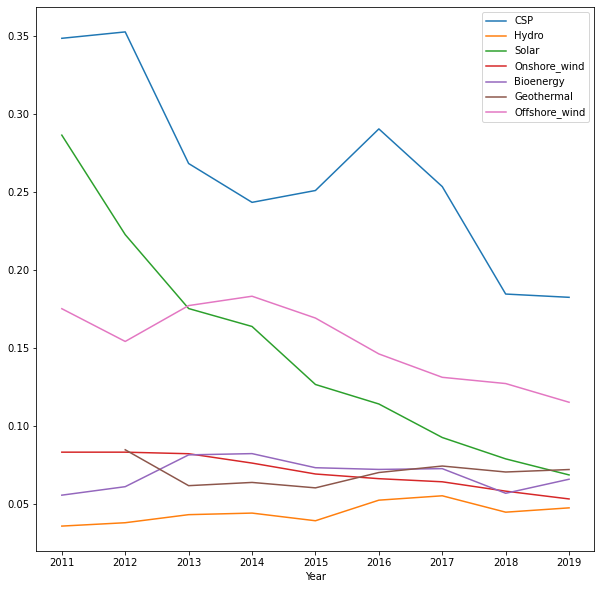

In [ ]:
#Vervolgens wil ik de data in een plot krijgen. Ik wil zien hoe de ontwikkelingen gaan de afgelopen jaren. 
#De data loopt tot 2019 maar je ziet bijvoorbeeld dat Solar technologie steeds goedkoper wordt (stijle lijn)
#Maar dat op dit moment Hydro technologie nog het goedkoopst is. Conclusie: als deze trend zich voortzet dan wordt Solartechnologie het goedkoopst. 

import matplotlib.pyplot as plt

df = pd.DataFrame(df_cost_non_fossil, columns=['Year','CSP', 'Hydro', 'Solar', 'Onshore_wind', 'Bioenergy', 'Geothermal', 'Offshore_wind'])
df.plot(x="Year", y=['CSP', 'Hydro', 'Solar', 'Onshore_wind', 'Bioenergy', 'Geothermal', 'Offshore_wind'], kind='line', figsize=(10,10))